## 교차검증 
## Cross Validation

아래 그림처럼 Fold는 파란색 네모를 의미한다. 즉 만약 Fold 개수(K값)를 5로 설정한다면 위 그림 처럼 5번의 모델링 검증을 시행할 것이다. 하지만 1번 검증을 시행할 때마다 검증용 데이터가 각각 파란색으로 매번 달라진다. 그리고 모든 교차검증이 종료되고 즉, 5번의 검증이 종료된 후 각 검증마다 도출된 정확도들의 **평균값**으로 최종적인 정확도를 계산하게 된다.




![K-Fold Cross Validation](kfold_2.png)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
kf = KFold(n_splits=5)
all_acc = []
fold_idx = 0

In [3]:
features = iris.data
labels = iris.target

In [4]:
for train_idx, test_idx in kf.split(features):
    
    train_x, train_y = features[train_idx], labels[train_idx]
    test_x, test_y = features[test_idx], labels[test_idx]
    
    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    acc = accuracy_score(test_y, pred_y)
    
    fold_idx += 1
    
    all_acc.append(acc)


In [4]:
print(f"KFold 모두 수행 후 평균 예측도 : {np.mean(all_acc)}")

KFold 모두 수행 후 평균 예측도 : 0.9066666666666666


계층별 K-겹 교차 검증

In [13]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


In [14]:
iris = load_iris()

In [15]:
print('iris label \n{}'.format(iris.target))
print('''iris label's bin \n{}'''.format(np.bincount(iris.target)))

iris label 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris label's bin 
[50 50 50]


STRATIFIED CROSS VALIDATION
계층별 k-겹 교차 검증

Stratified KFold CV : 불균형한 분포도를 가진 레이블에 쓰임. 분류분석

 

Stratified Kfold 는 Kfold가 레이블 데이터가 제대로 분배되지 못하는 경우의 문제를 해결해 준다. 
원본 데이터의 레이블 분포를 먼저 고려한뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배하는 방식
레이블 분포에 따라 학습/테스트 세트를 나눔
 

In [4]:
!pip install mglearn

You should consider upgrading via the 'c:\python39-at\python.exe -m pip install --upgrade pip' command.


  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=8969383cfee8f4a09dc61f6b6268374a7c1349bfb8f6d2609b8d073c4af206f0
  Stored in directory: c:\users\jaemi\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


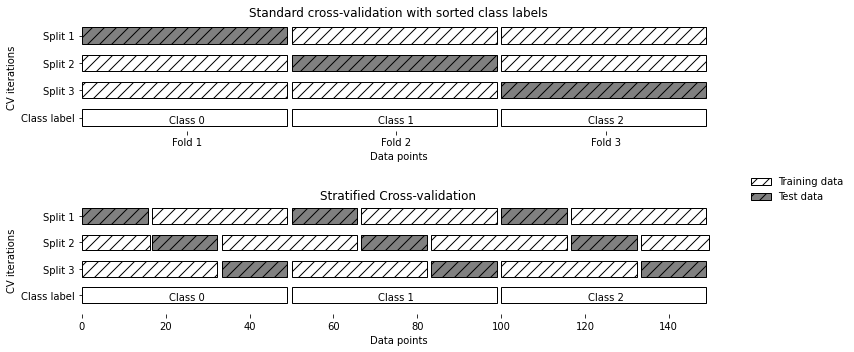

In [8]:
 import mglearn



# matplotlob 설정

matplotlib.rc('font', family='AppleGothic') # 한글출력

plt.rcParams['axes.unicode_minus']=False # 축 -



mglearn.plots.plot_stratified_cross_validation()

plt.show()

Reference: https://woolulu.tistory.com/70